In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
x_data = np.linspace(0,10,10**4)
noise = np.random.randn(len(x_data))
y_true = (.75 * x_data) + 5 + noise

In [5]:
my_data = pd.concat([pd.DataFrame(data=x_data, columns=['X Data']),
                    pd.DataFrame(data=y_true, columns=['Y'])],
                   axis=1)

<AxesSubplot:xlabel='X Data', ylabel='Y'>

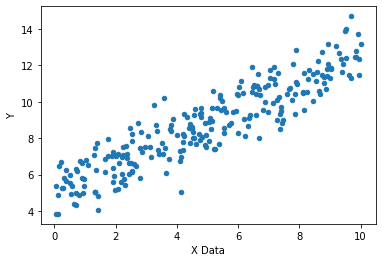

In [9]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')

In [10]:
import tensorflow as tf

2022-05-09 00:59:49.235642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-09 00:59:49.235672: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Find m, b by Tensorflow

In [12]:
tf.__version__

'2.8.0'

In [13]:
import tensorflow.compat.v1 as tf

In [14]:
tf.__version__

'2.8.0'

In [15]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [33]:
with tf.device('/device:CPU:0'):
    m = tf.Variable(tf.ones([1], tf.float32))
    b = tf.Variable(tf.ones([1], tf.float32))
    xph = tf.placeholder(tf.float32, [10])    
    yph = tf.placeholder(tf.float32, [10])
    y = m * xph + b

TypeError: device() missing 1 required positional argument: 'device_name_or_function'

In [17]:
y

<tf.Tensor 'add:0' shape=(10,) dtype=float32>

In [18]:
b

<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>

In [19]:
xph

<tf.Tensor 'Placeholder:0' shape=(10,) dtype=float32>

In [20]:
m

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>

In [34]:
with tf.device():
    error = tf.reduce_sum(tf.square(y-yph))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001)
    train = optimizer.minimize(error)

In [35]:
init = tf.global_variables_initializer()

In [36]:
config = tf.ConfigProto()
config.log_device_placement = True
config.gpu_options.per_process_gpu_memory_fraction =.7
config.gpu_options.allow_growth = True

In [37]:
with tf.Session(config=config) as sess:
    sess.run(init)
    epoch = 1000
    for i in range(epcoh):
        rand_ind = np.random.randint(len(x_data), size=10)
        feed = {xph:x_data[rand_ind], 
               yph:y_true[rand_ind]}
        sess.run(train, feed, dict=feed)
    model_m, model_b = sess.run([m,b])

Device mapping: no known devices.


InvalidArgumentError: Graph execution error:

Detected at node 'Variable' defined at (most recent call last):
    File "/home/liberio/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/liberio/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/liberio/anaconda3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/home/liberio/anaconda3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/home/liberio/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_80982/1382709384.py", line 2, in <module>
      m = tf.Variable(tf.ones([1], tf.float32))
Node: 'Variable'
Cannot assign a device for operation Variable: {{node Variable}} was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Variable]]